### <font color=green>Chapter 9.P3.</font>
<font color=green>Here we explore the maximal margin classifier on a toy data set.</font>

### <font color=green>9.P3.(a) </font>
<font color=green>We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label.</font>

| Obs. | X_1 | X_2 | Y |
|------|----|----|------|
| 1    | 3  | 4  | Red  |
| 2    | 2  | 2  | Red  |
| 3    | 4  | 4  | Red  |
| 4    | 1  | 4  | Red  |
| 5    | 2  | 1  | Blue |
| 6    | 4  | 3  | Blue |
| 7    | 4  | 1  | Blue |

<font color=green>Sketch the observations.</font>

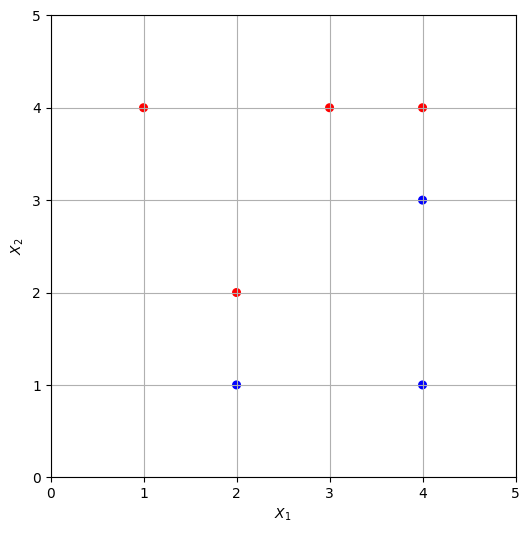

In [4]:
# answer 9.P3.(a)

x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ['red'] * 4 + ['blue'] * 3

plt.figure(figsize=(6, 6))
plt.scatter(x1, x2, c=colors, s=30)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P3.(b) </font>
<font color=green>Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).</font>

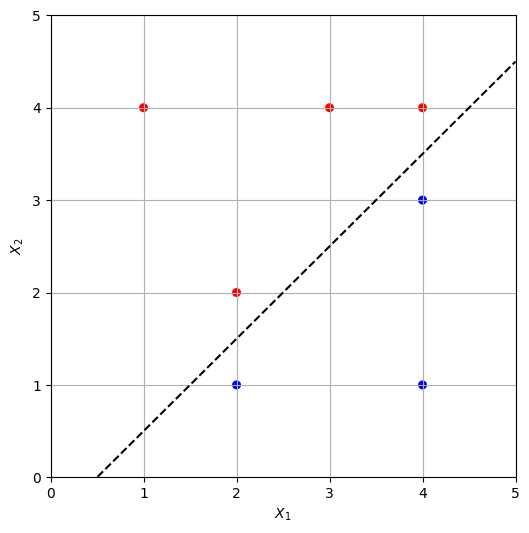

In [5]:
# answer 9.P3.(b)

plt.figure(figsize=(6, 6))
plt.scatter(x1, x2, c=colors, s=30)

x_vals = np.array([0, 5])
y_vals = 1 * x_vals + -0.5
plt.plot(x_vals, y_vals, 'k--')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

그림에서 확인할 수 있듯이, 최적의 분리 초평면은 관측치 (2, 1)과 (2, 2) 사이, 그리고 (4, 3)과 (4, 4) 사이에 위치해야 함

이는 클래스 간 가장 가까운 점들의 중간을 지나는 선이며, 해당 선은 (2, 1.5)와 (4, 3.5)를 지나게 됨

따라서 최적의 결정경계는 다음과 같은 직선으로 나타낼 수 있음:

$$
X_1−X_2−0.5=0
$$

### <font color=green>9.P3.(c) </font>
<font color=green>
Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0$, and classify to Blue otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.
</font>

### answer 9.P3.(c)

이전에 구한 최적 분리 초평면의 방정식은 :
$$
X_2 = X_1 − 0.5
$$

이 선 위의 좌변과 우변을 정리하면 다음과 같은 형식으로 표현할 수 있습니다:
$$X_2 − X_1 + 0.5 > 0 → Red\_class,$$
$$X_2 − X_1 + 0.5 ≤ 0 → Blue\_class$$

따라서 분류기는 아래 식을 기반으로 작동합니다:
$$f(X) = X_2 − X_1 + 0.5$$

따라서 계수는 다음과 같습니다:
$$β_0 = 0.5, β_1 = -1, β_2 = 1$$

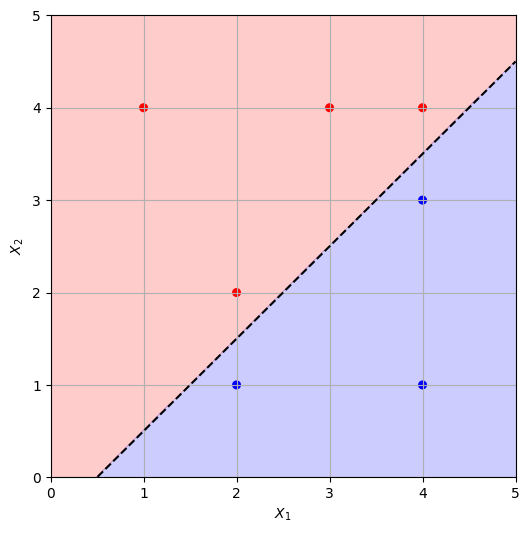

In [21]:
xx, yy = np.meshgrid(np.linspace(0, 5, 200), np.linspace(0, 5, 200))
zz = yy - xx + 0.5

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, zz > 0, alpha=0.2, colors=["blue", "red"])
plt.scatter(x1, x2, c=colors, s=30)

x_vals = np.array([0, 5])
y_vals = 1 * x_vals - 0.5
plt.plot(x_vals, y_vals, 'k--')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P3.(d) </font>
<font color=green>
On your sketch, indicate the margin for the maximal margin
hyperplane.
</font>

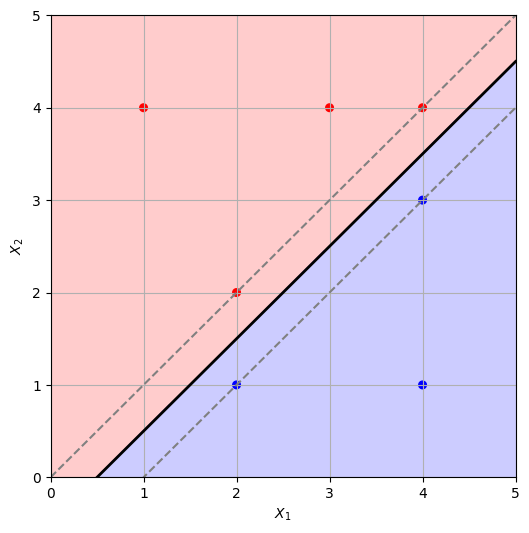

In [38]:
# answer 9.P3.(d)

xx, yy = np.meshgrid(np.linspace(0, 5, 200), np.linspace(0, 5, 200))
zz = yy - xx + 0.5

x_vals = np.array([0, 5])
y_main = x_vals - 0.5
y_margin_upper = x_vals
y_margin_lower = x_vals - 1

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, zz > 0, alpha=0.2, colors=["blue", "red"])

plt.plot(x_vals, y_main, color='black', linewidth=2)
plt.plot(x_vals, y_margin_upper, linestyle='--', color='grey')
plt.plot(x_vals, y_margin_lower, linestyle='--', color='grey')
plt.scatter(x1, x2, c=colors, s=30)

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P3.(e) </font>
<font color=green>
Indicate the support vectors for the maximal margin classifier.
</font>

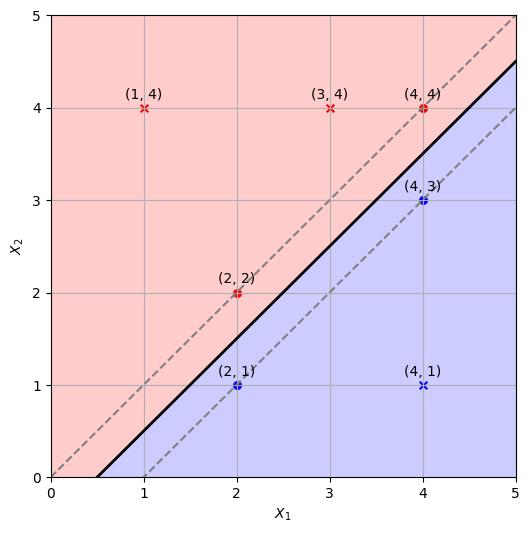

In [54]:
# answer 9.P3.(e)

support = []
for i in range(len(x1)):
    margin_distance = x2[i] - x1[i]
    support.append('o') if margin_distance == 0 or margin_distance == -1 else support.append('x')
    
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, zz > 0, alpha=0.2, colors=["blue", "red"])

plt.plot(x_vals, y_main, color='black', linewidth=2)
plt.plot(x_vals, y_margin_upper, linestyle='--', color='grey')
plt.plot(x_vals, y_margin_lower, linestyle='--', color='grey')

for i in range(len(x1)):
    plt.scatter(x1[i], x2[i], c=colors[i], s=30, marker=support[i])
    plt.text(x1[i], x2[i] + 0.1, f"({x1[i]}, {x2[i]})", ha='center')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

서포트 벡터는 점 (2,1), (2,2), (4,3), (4,4)

### <font color=green>9.P3.(f) </font>
<font color=green>
Argue that a slight movement of the seventh observation would
not affect the maximal margin hyperplane.
</font>

### answer 9.P3.(f)

관측치 (4,1)는 서포트 벡터가 아니기 때문에, 그 위치를 약간 움직이더라도 최대 마진 초평면에는 아무런 영향을 주지 않음

최대 마진 초평면은 클래스 간의 마진을 최대로 만드는 결정 경계로, 서포트 벡터만이 이 초평면의 위치에 영향을 미침

즉, 마진 경계 안쪽으로 들어오지 않는 한, 나머지 관측치는 초평면 결정에 영향을 주지 않음

관측치 7은 현재 마진 경계 바깥에 위치해 있으므로, 어느 방향으로 조금 이동하더라도 결정 경계는 변하지 않음

### <font color=green>9.P3.(g) </font>
<font color=green>
Sketch a hyperplane that is not the optimal separating hyperplane,
and provide the equation for this hyperplane.
</font>

### answer 9.P3.(g)

최적 분리 초평면이 아닌, 하지만 여전히 두 클래스를 분리할 수 있는 대안 초평면은 다음과 같을 수 있음 :

$$
X_1 - X_2 - 0.3 = 0
$$

이 초평면 또한 클래스 간의 구분은 가능하지만, 마진이 좁고 일부 새로운 데이터가 추가되면 쉽게 분리가 불가능해질 수 있음

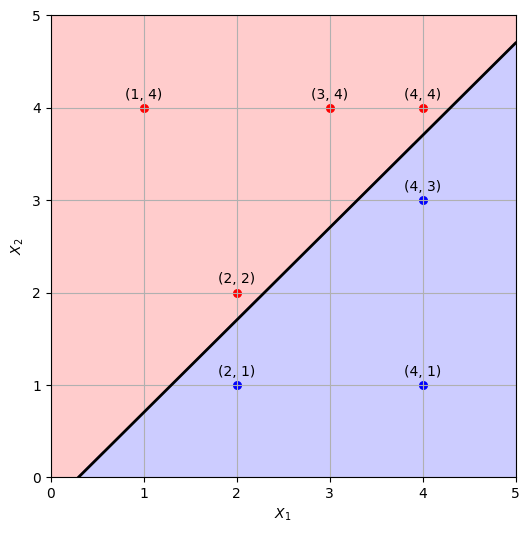

In [70]:
xx, yy = np.meshgrid(np.linspace(0, 5, 200), np.linspace(0, 5, 200))
zz = xx - yy - 0.3

x_vals = np.array([0, 5])
y_main = x_vals - 0.3
    
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, zz <= 0, alpha=0.2, colors=["blue", "red"])
plt.plot(x_vals, y_main, color='black', linewidth=2)

for i in range(len(x1)):
    plt.scatter(x1[i], x2[i], c=colors[i], s=30)
    plt.text(x1[i], x2[i] + 0.1, f"({x1[i]}, {x2[i]})", ha='center')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P3.(h) </font>
<font color=green>
Draw an additional observation on the plot so that the two
classes are no longer separable by a hyperplane.
</font>

### answer 9.P3.(h)

아래 그림에서는 새로운 관측치 (2, 3) 또는 (3, 1)을 추가함으로써, 두 클래스가 이제 선형 초평면으로는 완전히 분리되지 않음

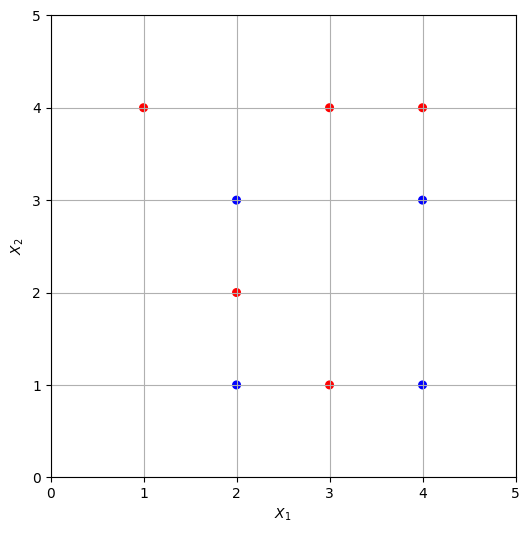

In [73]:
x1 = [3, 2, 4, 1, 2, 4, 4, 2, 3]
x2 = [4, 2, 4, 4, 1, 3, 1, 3, 1]
colors = ['red'] * 4 + ['blue'] * 4 + ['red']

plt.figure(figsize=(6, 6))
plt.scatter(x1, x2, c=colors, s=30)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>Chapter 9.P5.</font>
<font color=green>
We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.
</font>

### <font color=green>9.P5.(a) </font>
<font color=green>
Generate a data set with $n = 500$ and $p = 2$, such that the observations
belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows:
</font>

```python
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0
```

In [123]:
# answer 9.P5.(a)

rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

In [75]:
df

,x1,x2,y
0,0.305003,-0.256576,True
1,0.307941,0.211346,True
2,0.015326,0.208829,False
3,-0.214199,-0.078177,True
4,-0.446069,-0.040580,True
...,...,...,...
495,-0.094687,0.289493,False
496,-0.259470,-0.444608,False
497,-0.080933,-0.335240,False
498,0.181635,0.382872,False


### <font color=green>9.P5.(b) </font>
<font color=green>
Plot the observations, colored according to their class labels.
Your plot should display $X_1$ on the x-axis, and $X_2$ on the yaxis.
</font>

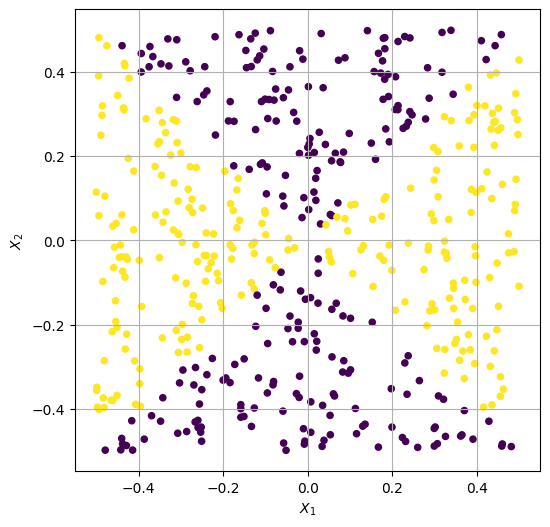

In [124]:
# answer 9.P5.(b)

plt.figure(figsize=(6, 6))
plt.scatter(x1, x2, c=y, s=20)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P5.(c) </font>
<font color=green>
Fit a logistic regression model to the data, using $X_1$ and $X_2$ as
predictors.
</font>

In [135]:
# answer 9.P5.(c)

design = ModelSpec(df[['x1', 'x2']])
X = design.fit_transform(df)

model = sm.GLM(df['y'], X, family=sm.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -346.36
Date:                Thu, 19 Jun 2025   Deviance:                       692.71
Time:                        16:25:13   Pearson chi2:                     500.
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0007282
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0221      0.090      0.246      0.8

### <font color=green>9.P5.(d) </font>
<font color=green>
Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations,
colored according to the predicted class labels. The
decision boundary should be linear.
</font>

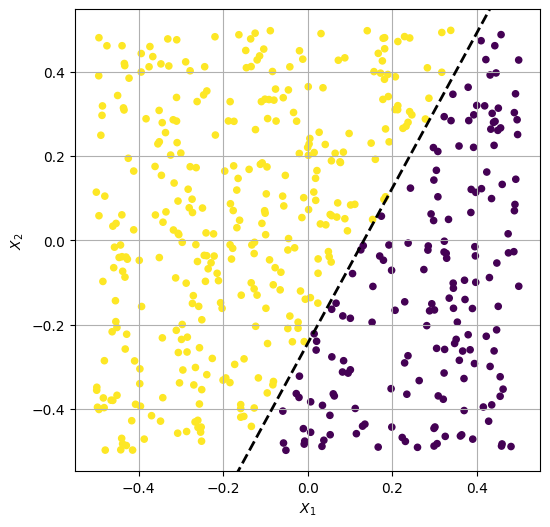

In [136]:
# answer 9.P5.(d)

glm_dummy = [True if x>0.5 else False for x in results.predict(X)]

plt.figure(figsize=(6, 6))
plt.scatter(x1, x2, c=glm_dummy, s=20)

x1_vals = np.linspace(-0.5, 0.5, 200)
coef = results.params
x2_vals = -(coef[0] + coef[1] * x1_vals) / coef[2]
plt.plot(x1_vals, x2_vals, 'k--', linewidth=2)

plt.ylim(x2.min()-0.05, x2.max()+0.05)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P5.(e) </font>
<font color=green>
Now fit a logistic regression model to the data using non-linear
functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$, $X_1×X_2$, $log(X2)$,
and so forth).
</font>

In [144]:
# answer 9.P5.(e)

df['x1_sq'] = df['x1']**2
df['x2_sq'] = df['x2']**2

design = ModelSpec(df[['x1', 'x2', 'x1_sq', 'x2_sq']])
X = design.fit_transform(df)

model = sm.GLM(df['y'], X, family=sm.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      495
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 19 Jun 2025   Deviance:                   7.0793e-09
Time:                        16:32:58   Pearson chi2:                 3.54e-09
No. Iterations:                    33   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.7367   3.31e+04      0.001      0.9

### <font color=green>9.P5.(f) </font>
<font color=green>
Apply this model to the training data in order to obtain a predicted
class label for each training observation. Plot the observations,
colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)–(e) until you come up with an example in which
the predicted class labels are obviously non-linear.
</font>

### answer 9.P5.(f)

이차항 $X_1^2$와 $X_2^2$를 포함한 로지스틱 회귀 모델을 학습 데이터에 적용한 결과

모델 학습 후, 각 훈련 샘플에 대해 예측 확률이 0.5를 초과하는지를 기준으로 예측 클래스 레이블을 생성

그 결과로 얻어진 결정 경계는 비선형 형태를 나타내며, 훈련 데이터에 대해 완벽한 분리를 수행

Accuracy: 1.0000


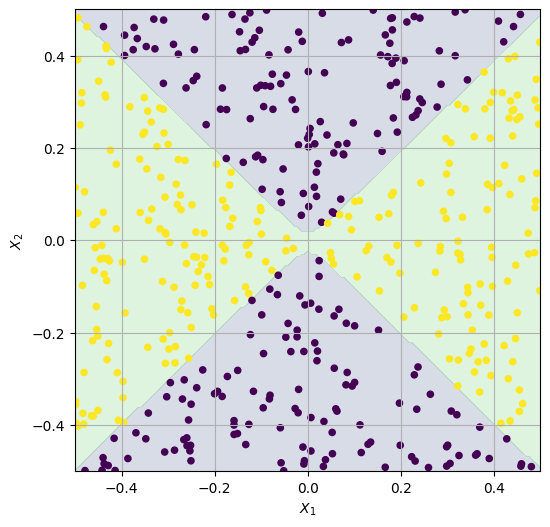

In [158]:
xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, 200), np.linspace(-0.5, 0.5, 200))
grid = pd.DataFrame({
    'x1': xx.ravel(), 
    'x2': yy.ravel(),
    'x1_sq' : grid['x1']**2,
    'x2_sq' : grid['x2']**2
})

gridX = sm.add_constant(grid[['x1', 'x2', 'x1_sq', 'x2_sq']])
probs = result.predict(gridX).values.reshape(xx.shape)
y_pred = result.predict(X) > 0.5

accuracy = (df['y'] == y_pred).mean()
print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, probs > 0.5, alpha=0.2)

plt.scatter(df['x1'], df['x2'], c=y_pred, s=20)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P5.(g) </font>
<font color=green>
Fit a support vector classifier to the data with $X_1$ and $X_2$ as
predictors. Obtain a class prediction for each training observation.
Plot the observations, colored according to the predicted
class labels.
</font>

### answer 9.P5.(g)

선형커널을 사용한 서포트 벡터 분류기(비용이 낮더라도)는 모든 점을 단일 클래스로 분류

예측 정확도는 데이터 세트에서 클래스 0 관측치의 비율과 동일

Accuracy: 0.5060


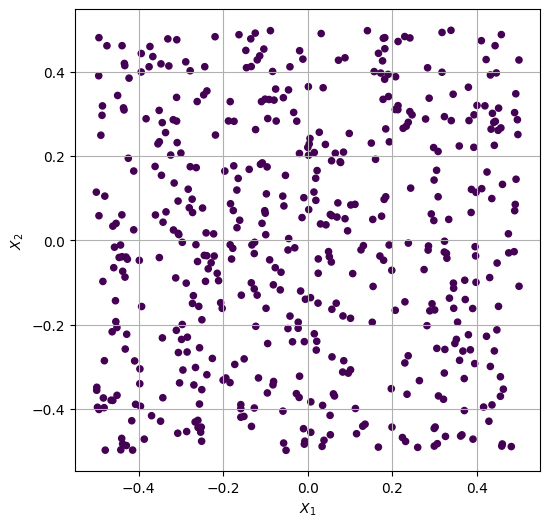

In [198]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=0.1)
model.fit(df[['x1', 'x2']], df['y'])
y_pred = model.predict(df[['x1', 'x2']])

accuracy = np.mean(y_pred == df['y'])
print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(df['x1'], df['x2'], c=y_pred, s=20)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P5.(h) </font>
<font color=green>
Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.
</font>

### answer 9.P5.(g)

poly 커널을 사용하는 비선형 SVM을 적합결과 이전의 비선형 로지스틱 회귀와 유사하게 두 클래스를 분리

시각적으로 살펴보면, 비선형 결정 경계는 실제 결정 경계와 매우 유사함

이는 커널 SVM이 복잡한 비선형 경계도 잘 모델링할 수 있다는 것을 나타냄

Accuracy: 0.9660


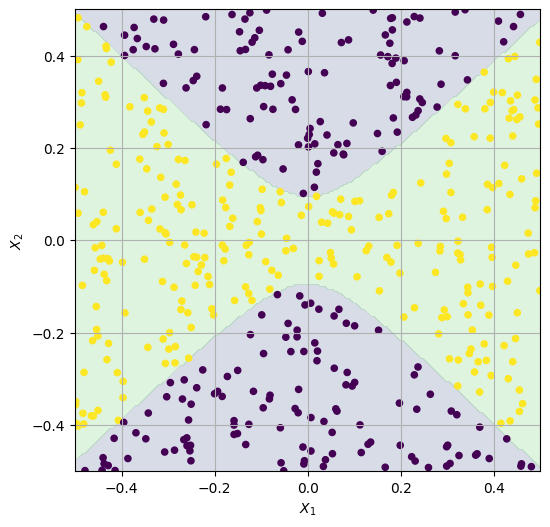

In [208]:
model = SVC(kernel='poly', degree=2, C=0.1)
model.fit(df[['x1', 'x2']], df['y'])

y_pred = model.predict(df[['x1', 'x2']])

xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, 200), np.linspace(-0.5, 0.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = model.predict(grid).reshape(xx.shape)

accuracy = np.mean(y_pred == df['y'])
print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, zz, alpha=0.2)
plt.scatter(df['x1'], df['x2'], c=y_pred, s=20)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

### <font color=green>9.P5.(i) </font>
<font color=green>
Comment on your results.
</font>

### answer 9.P5.(i)

비선형 커널(다항 커널, 차수=2)을 사용한 SVM은 훈련 데이터에 대해 완벽한 분류를 수행

모델이 생성한 결정 경계는 명백하게 비선형이며, 이는 데이터가 생성된 구조($y = x_1^2 - x_2^2 > 0$)와 일치

앞선 이차항을 포함한 로지스틱 회귀 실험 결과와도 유사하며, 이는 모델이 복잡한 경계를 잘 학습하고 반영했음을 확인할 수 있음